In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set_theme(rc = ({'figure.figsize' : (14, 6)}))

In [2]:
data = pd.read_csv('hr.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
data['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
data = data.rename(columns = {'sales' : 'department'})

In [8]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 1.Смотрим на распределение признаков

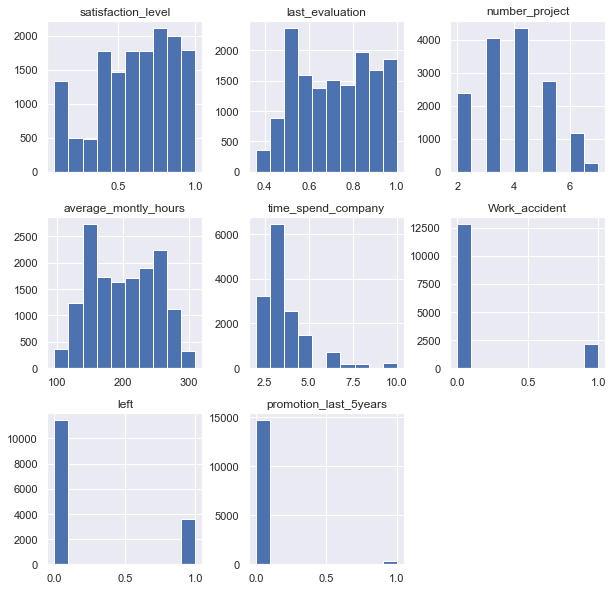

In [ ]:
data.hist()
plt.show()

### 2.Смотрим на удовлетворенность работой в отделах в разрезе зарплат

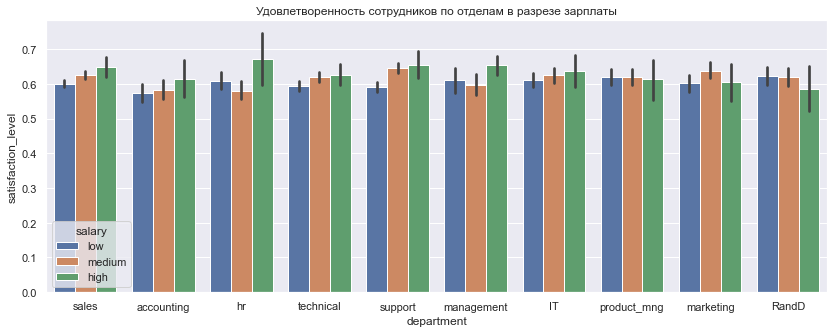

In [ ]:
sns.barplot(data = data, x = 'department', y = 'satisfaction_level', hue = 'salary')
plt.title('Удовлетворенность сотрудников по отделам в разрезе зарплаты')
plt.show()

### 3.Смотрим на соотношение людей, которые остались к тем, кто ушел 

Text(0.5, 1.0, 'Распределение количества сотрудников ушел/остался')

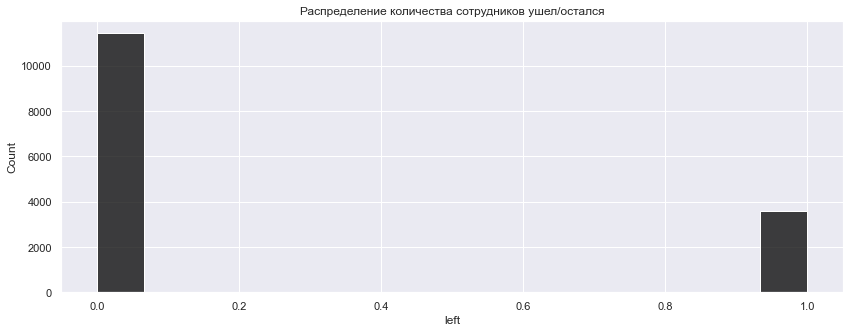

In [ ]:
sns.histplot(data = data, x = 'left', color = 'black')
plt.title('Распределение количества сотрудников ушел/остался')

### 3.Тут мы нашли, что чаще всего люди уходят из отдела кадров

In [ ]:
department = data.groupby(by = ['department', 'left'], as_index = False)[['salary']].count()

In [ ]:
department_pivot = department.pivot(index = 'department', columns = 'left', values = 'salary').reset_index()

In [ ]:
department_pivot['share'] = department_pivot[1]/department_pivot[0]
department_pivot.sort_values(by = ['share'], ascending=False)

left,department,0,1,share
3,hr,524,215,0.410305
2,accounting,563,204,0.362345
9,technical,2023,697,0.344538
8,support,1674,555,0.331541
7,sales,3126,1014,0.324376
5,marketing,655,203,0.309924
0,IT,954,273,0.286164
6,product_mng,704,198,0.281250
1,RandD,666,121,0.181682
4,management,539,91,0.168831


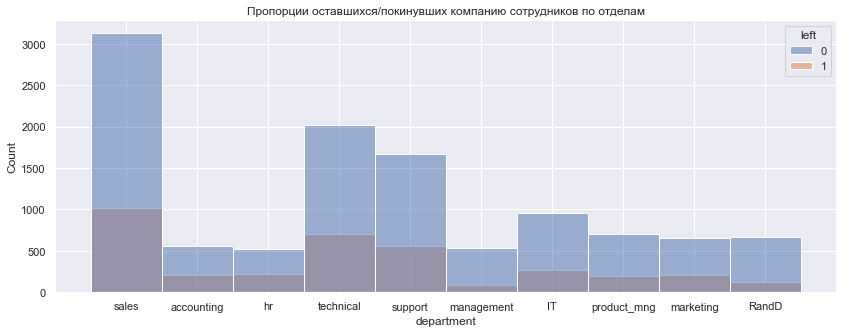

In [ ]:
sns.histplot(data = data, x = 'department', hue = 'left')
plt.title('Пропорции оставшихся/покинувших компанию сотрудников по отделам')
plt.show()

### 4.Смотрим на средний уровень удовлетворенности сотрудников по отделам в разрезе тех кто ушел и остался

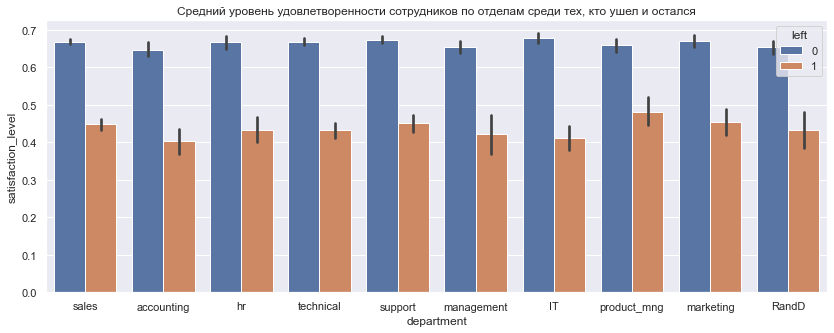

In [ ]:
sns.barplot(data = data, x = 'department', y = 'satisfaction_level', hue = 'left')
plt.title('Средний уровень удовлетворенности сотрудников по отделам среди тех, кто ушел и остался')
plt.show()

In [ ]:
data.groupby(by = ['department', 'left']).agg({'satisfaction_level':'mean'})

satisfaction_level
department  left                    
IT          0               0.677170
            1               0.411868
RandD       0               0.653799
            1               0.432810
accounting  0               0.647211
            1               0.402598
hr          0               0.666679
            1               0.433395
management  0               0.654861
            1               0.422857
marketing   0               0.669878
            1               0.453153
product_mng 0               0.658466
            1               0.481566
sales       0               0.668548
            1               0.447663
support     0               0.673799
            1               0.450901
technical   0               0.668319
            1               0.432525

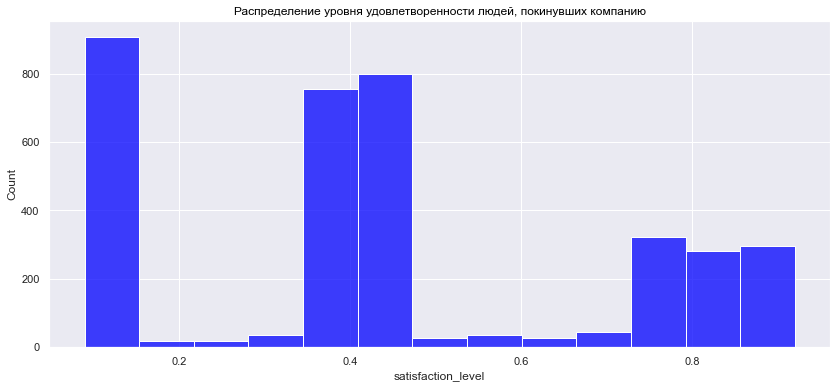

In [10]:
sns.histplot(data = data[data['left'] == 1], x = 'satisfaction_level', palette = 'whinter', color = 'blue')
plt.title('Распределение уровня удовлетворенности людей, покинувших компанию', color = 'black')
plt.show()

In [ ]:
data[data['satisfaction_level'] < 0.53].groupby(by = 'left').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
left,,,,,,,,,
0,2640,2640,2640,2640,2640,2640,2640,2640,2640
1,2555,2555,2555,2555,2555,2555,2555,2555,2555


In [ ]:
data[(data['satisfaction_level'] < 0.45) ].groupby(by = 'left').count()

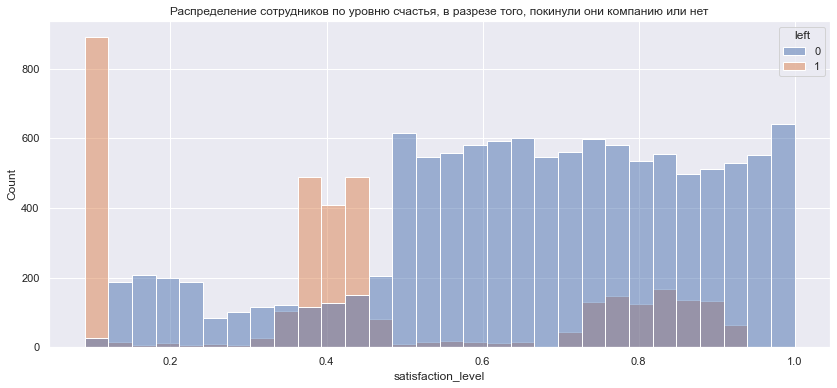

In [11]:
sns.histplot(data = data, x = 'satisfaction_level', hue = 'left')
plt.title('Распределение сотрудников по уровню счастья, в разрезе того, покинули они компанию или нет')
plt.show()

### 5.Строим матрицу корреляций

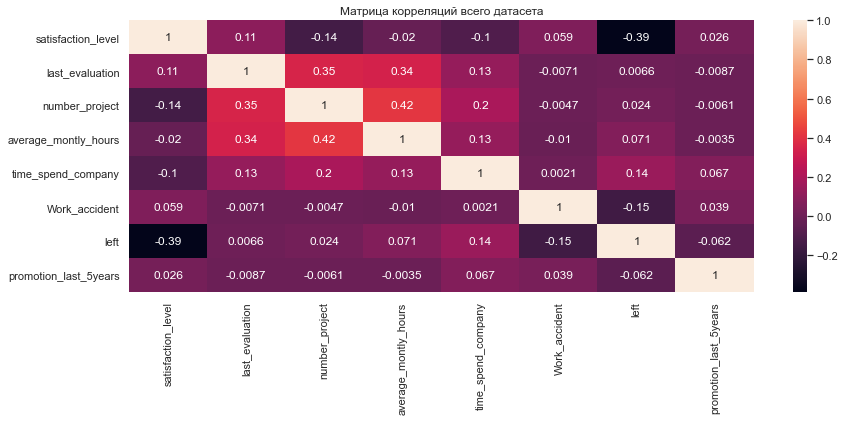

In [ ]:
sns.heatmap(data=data.corr(),annot = True)
plt.title('Матрица корреляций всего датасета')
plt.show()

### 6.Визуализация связей в таблице

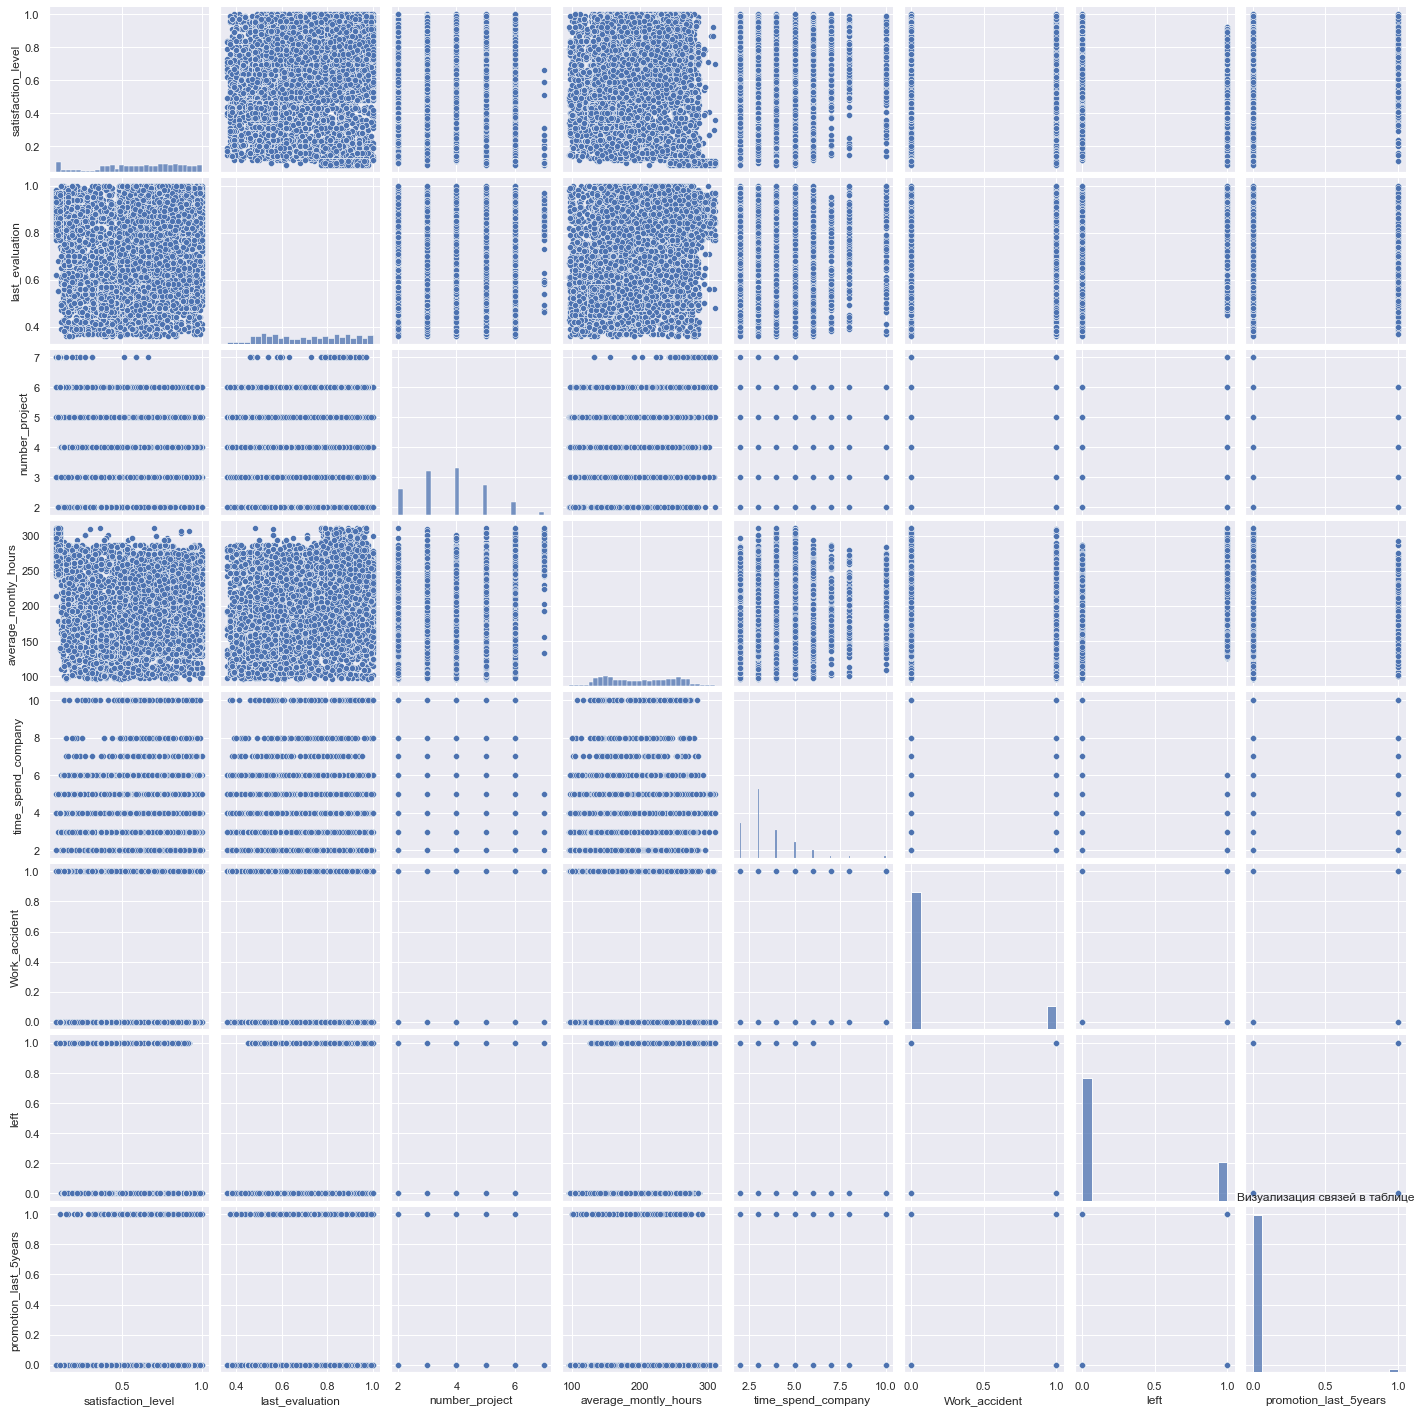

In [ ]:
sns.pairplot(data = data)
plt.title('Визуализация связей в таблице')
plt.show()

### 7.Распределение сотрудников по зарплатам

In [ ]:
grouped_salary = data.groupby(by= ['department', 'salary'], as_index = False) \
                     .agg({'left':'count'}) \
                     .rename(columns = {'left' : 'count'}) \
                     .sort_values(by = ['department', 'salary'])
grouped_salary.head()

,department,salary,count
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364


In [ ]:
dep_by_salary = grouped_salary.set_index(['department', 'salary'])

In [ ]:
a = dep_by_salary.reindex(level = 1, index=['low', 'medium', 'high'])
b = a.reset_index()

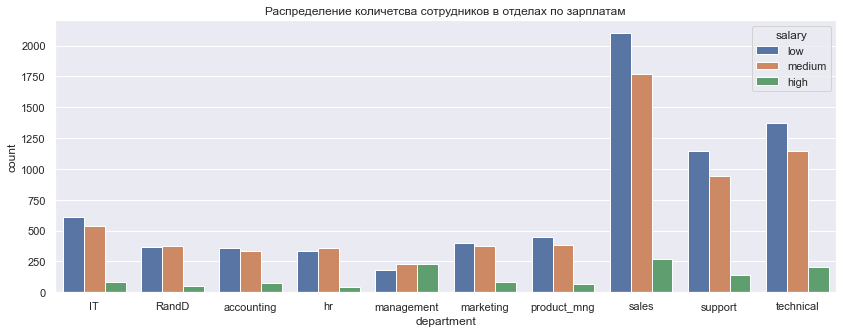

In [ ]:
sns.barplot(data = b, x = 'department', y = 'count', hue = 'salary')
plt.title('Распределение количетсва сотрудников в отделах по зарплатам')
plt.show()

In [ ]:
salary_left = data.groupby(by=['salary', 'left'], as_index = False) \
                  .agg({'department':'count'})

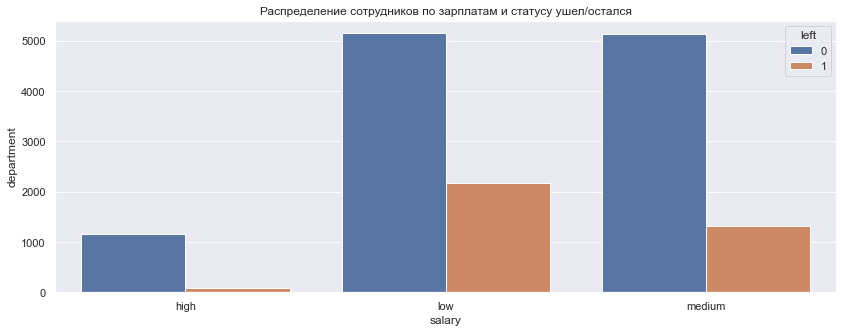

In [ ]:
sns.barplot(data = salary_left, x = 'salary', y = 'department', hue = 'left')
plt.title('Распределение сотрудников по зарплатам и статусу ушел/остался')
plt.show()

In [ ]:
salary_pivot = salary_left.pivot(index = 'salary', columns = 'left', values = 'department')

In [ ]:
salary_pivot['share'] = salary_pivot[1]/salary_pivot[0]
salary_pivot.sort_values(by = 'share', ascending = False)

left,0,1,share
salary,,,
low,5144,2172,0.422240
medium,5129,1317,0.256775
high,1155,82,0.070996


### 8.Сколько сотрудников покинули компанию

In [ ]:
'Компанию покинули {} человек.'.format(len(data[data['left'] == 1]))

'Компанию покинули 3571 человек.'

### 9.Проверка гипотез для данных

In [ ]:
left = data[data['left'] == 1]

In [ ]:
still = data[data['left'] == 0]

In [ ]:
left.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


In [ ]:
still.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0,11428.000000
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.0,0.159889
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.0,0.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.0,0.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,0.0,1.000000


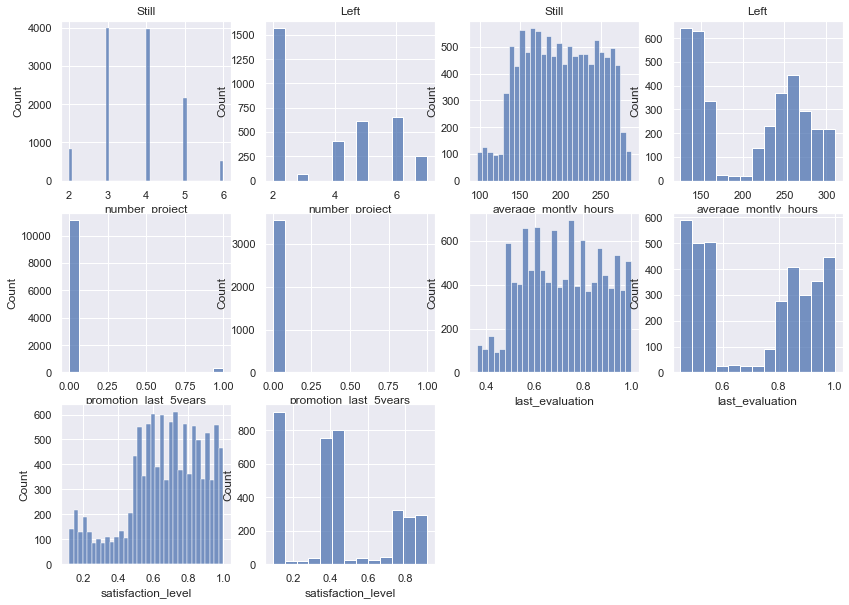

<Figure size 1440x1440 with 0 Axes>

In [ ]:
plt.subplot(3, 4, 1)
sns.histplot(still['number_project'])
plt.title('Still')
plt.subplot(3, 4, 2)
sns.histplot(left['number_project'])
plt.title('Left')
plt.subplot(3, 4, 3)
sns.histplot(still['average_montly_hours'])
plt.title('Still')
plt.subplot(3, 4, 4)
sns.histplot(left['average_montly_hours'])
plt.title('Left')
plt.subplot(3, 4, 5)
sns.histplot(still['promotion_last_5years'])
plt.subplot(3, 4, 6)
sns.histplot(left['promotion_last_5years'])
plt.subplot(3, 4, 7)
sns.histplot(still['last_evaluation'])
plt.subplot(3, 4, 8)
sns.histplot(left['last_evaluation'])
plt.subplot(3, 4, 9)
sns.histplot(still['satisfaction_level'])
plt.subplot(3, 4, 10)
sns.histplot(left['satisfaction_level'])
plt.gcf()
plt.figure(figsize = (20, 20))
plt.show()

### 10.Проверка гипотезы о раветстве уровня удовлетворения

In [ ]:
left['satisfaction_level'].mean(), still['satisfaction_level'].mean()

(0.44009801176140917, 0.666809590479516)

C:\Users\d.maryanovskiy\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\d.maryanovskiy\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


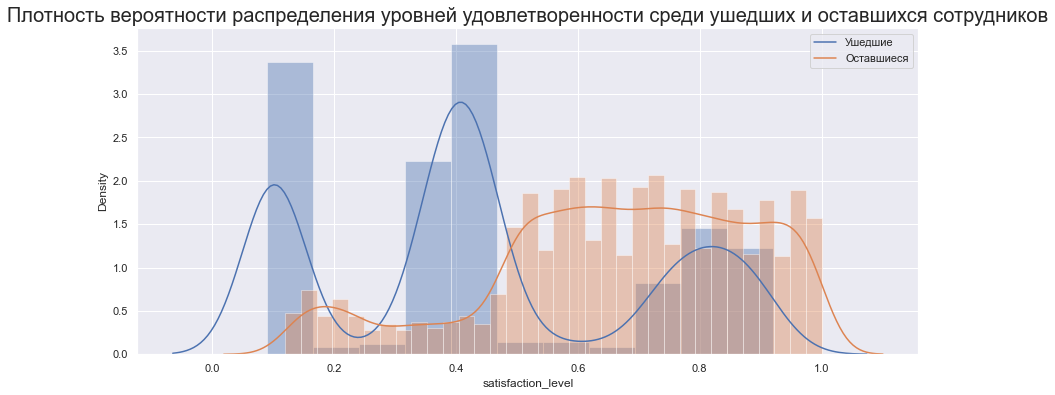

In [ ]:
sns.distplot(left['satisfaction_level'])
sns.distplot(still['satisfaction_level'])
plt.legend(['Ушедшие', 'Оставшиеся'])
plt.title('Плотность вероятности распределения уровней удовлетворенности среди ушедших и оставшихся сотрудников', fontsize = 20)
plt.show()

In [ ]:
stats.ttest_ind(left['satisfaction_level'], still['satisfaction_level'])

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

In [ ]:
stats.mannwhitneyu(left['satisfaction_level'], still['satisfaction_level'])

MannwhitneyuResult(statistic=10286473.0, pvalue=0.0)

В обоих тестах p-value равен 0, что говорит о неравенстве средних в выборках

### 11.Проверка гипотезы о равенстве средних в оценках сотрудников

In [ ]:
left['last_evaluation'].mean(), still['last_evaluation'].mean()

(0.7181125735088183, 0.7154733986699274)

C:\Users\d.maryanovskiy\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\d.maryanovskiy\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Плотность вероятности распределния оценок сотрудников ушедших и оставшихся в компании')

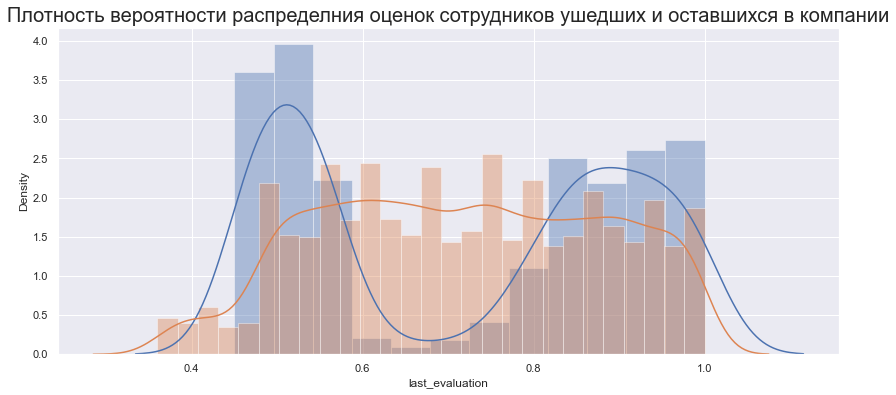

In [ ]:
sns.distplot(left['last_evaluation'])
sns.distplot(still['last_evaluation'])
plt.title('Плотность вероятности распределния оценок сотрудников ушедших и оставшихся в компании', fontsize = 20)

In [ ]:
stats.ttest_ind(left['last_evaluation'], still['last_evaluation'])

Ttest_indResult(statistic=0.8042416167796329, pvalue=0.4212701963735056)

In [ ]:
stats.mannwhitneyu(left['last_evaluation'], still['last_evaluation'])

MannwhitneyuResult(statistic=20337201.0, pvalue=0.3825174633239001)

Подсчитанный p-value~0.4 в Т-тесте и тесте Манна-Уитни, говорит о равентсве средних в этих выборках, хотя по гистограмме можно сказать, что выборки не равны

### 12.Проверка гипотезы о равентве средних рабочих часов по группам ушедших и оставшихся сотрудников

In [ ]:
left['average_montly_hours'].mean(), still['average_montly_hours'].mean()

(207.41921030523662, 199.0602030101505)

C:\Users\d.maryanovskiy\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\d.maryanovskiy\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


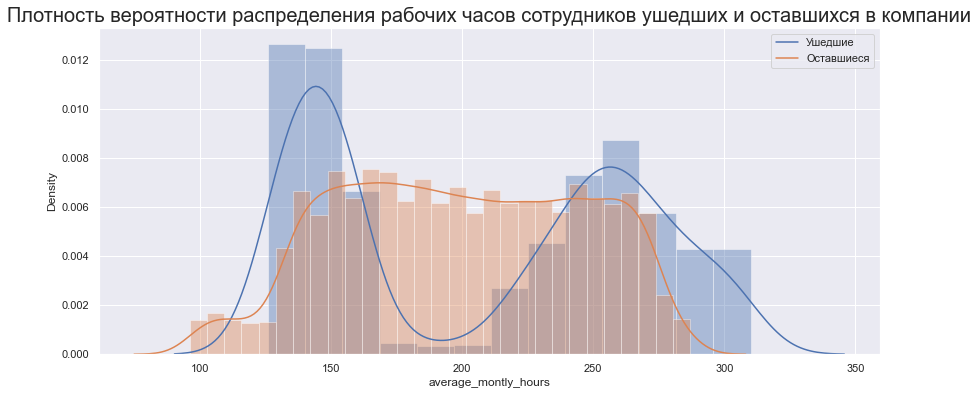

In [ ]:
sns.distplot(left['average_montly_hours'])
sns.distplot(still['average_montly_hours'])
plt.title('Плотность вероятности распределения рабочих часов сотрудников ушедших и оставшихся в компании', fontsize = 20)
plt.legend(['Ушедшие', 'Оставшиеся'])
plt.show()

In [ ]:
stats.ttest_ind(left['average_montly_hours'], still['average_montly_hours'])

Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)

При Т-тесте p-value ~ 0, что говорит о значимой разнице между выборками

In [ ]:
stats.mannwhitneyu(left['average_montly_hours'], still['average_montly_hours'])

MannwhitneyuResult(statistic=19119787.5, pvalue=6.384782992177166e-09)

При тесте Манна-Уитни p-value ~ 0, что тоже говорит о значительной разнице в выборках

### 13.Анализ количества инцедентов на работе

In [ ]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


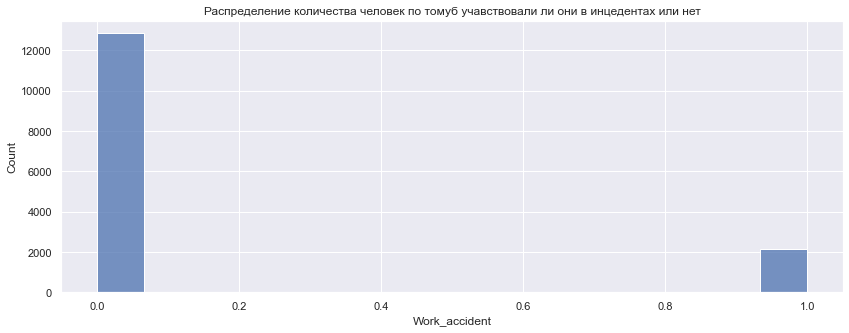

In [ ]:
sns.histplot(data['Work_accident'])
plt.title('Распределение количества человек по тому, учавствовали ли они в инцедентах или нет')
plt.show()

In [ ]:
accident_by_dep = data.groupby(by = ['Work_accident', 'department'], as_index = False).agg({'left':'count'}) \
                      .sort_values(by = 'department')

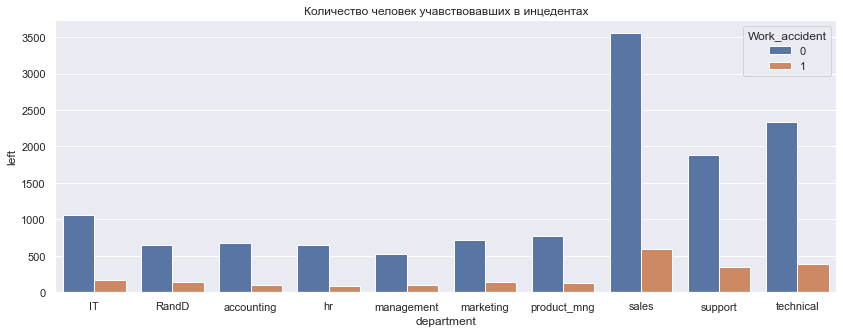

In [ ]:
sns.barplot(data = accident_by_dep, x = 'department', y = 'left', hue = 'Work_accident')
plt.title('Количество человек учавствовавших в инцедентах')
plt.show()

In [ ]:
accident_pivot = accidentb_by_dep.pivot(index = 'department', columns = 'Work_accident', values = 'left').reset_index()

In [ ]:
accident_pivot['share'] = accident_pivot[1]/accident_pivot[0]

In [ ]:
accident_pivot.sort_values(by = 'share', ascending = False)

Work_accident,department,0,1,share
1,RandD,653,134,0.205207
4,management,527,103,0.195446
5,marketing,720,138,0.191667
8,support,1884,345,0.183121
6,product_mng,770,132,0.171429
7,sales,3553,587,0.165212
9,technical,2339,381,0.162890
0,IT,1063,164,0.154280
2,accounting,671,96,0.143070
3,hr,650,89,0.136923


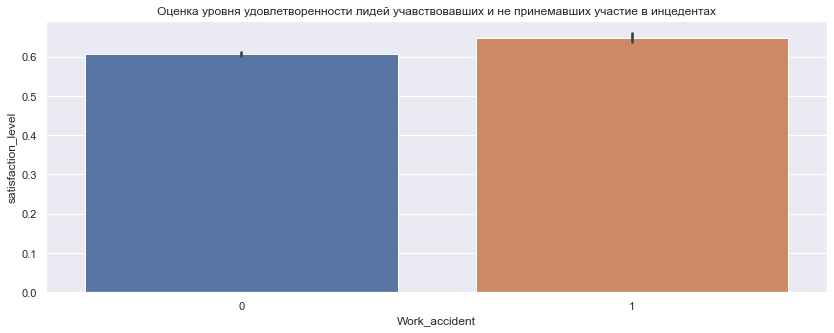

In [ ]:
sns.barplot(data = data, x = 'Work_accident', y = 'satisfaction_level')
plt.title('Оценка уровня удовлетворенности лидей учавствовавших и не принемавших участие в инцедентах')
plt.show()

In [ ]:
data.groupby(by = 'Work_accident').agg({'satisfaction_level' : 'mean'})

,satisfaction_level
Work_accident,
0,0.606833
1,0.648326


In [ ]:
happend = data[data['Work_accident'] == 1]
clear = data[data['Work_accident'] == 0]

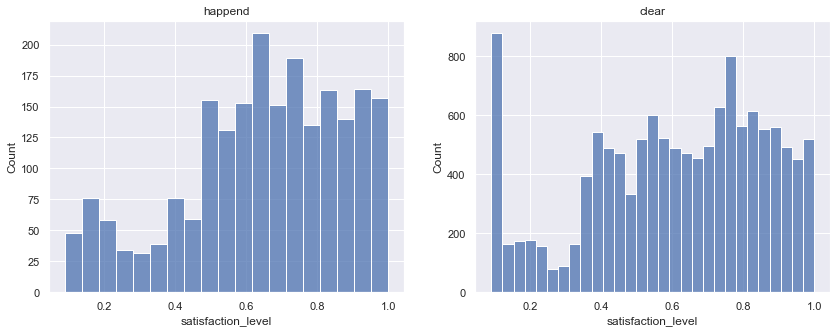

In [ ]:
plt.subplot(1, 2, 1)
sns.histplot(happend['satisfaction_level'])
plt.title('happend')
plt.subplot(1, 2, 2)
sns.histplot(clear['satisfaction_level'])
plt.title('clear')
plt.show()

### 14.Проверить продвижение

In [ ]:
promotion = data.groupby(by = ['department', 'promotion_last_5years'], as_index = False).agg({'left':'count'})

<AxesSubplot:xlabel='department', ylabel='left'>

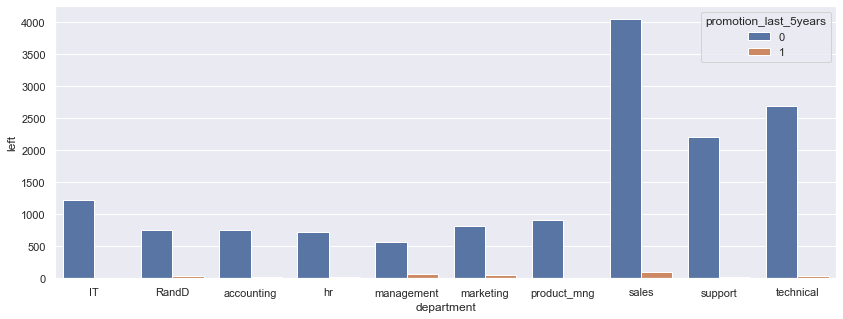

In [ ]:
sns.barplot(data = promotion, x = 'department', y = 'left', hue = 'promotion_last_5years')

In [ ]:
promotion_pivot = promotion.pivot(index = 'department', columns = 'promotion_last_5years', values = 'left') \
         .sort_values(by = 'department') \
         .reset_index()

In [ ]:
promotion_pivot['share'] = promotion_pivot[1]/promotion_pivot[0]

In [ ]:
promotion_pivot.sort_values(by = 'share', ascending = False)

promotion_last_5years,department,0,1,share
4,management,561.0,69.0,0.122995
5,marketing,815.0,43.0,0.052761
1,RandD,760.0,27.0,0.035526
7,sales,4040.0,100.0,0.024752
3,hr,724.0,15.0,0.020718
2,accounting,753.0,14.0,0.018592
9,technical,2692.0,28.0,0.010401
8,support,2209.0,20.0,0.009054
0,IT,1224.0,3.0,0.002451
6,product_mng,902.0,NaN,NaN


### 15.На настоящем этапе можно сказать, что люди, покидающие компанию:
- имеют низкую удовлетворенность на работе
- чаще получают низкую зарплату
- работают либо мало часов в месяц, либо очень много 

### 16.Сотрудники, которые верояно покинут компанию в будующем

In [ ]:
still.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [ ]:
high_probability_of_leaving = still[(still['satisfaction_level'] < 0.5) & (still['salary'] == 'low') 
      & ((still['average_montly_hours'] > 125) & (still['average_montly_hours'] < 170) 
      | (still['average_montly_hours'] > 240))].reset_index(drop = True)

In [ ]:
#К ГЛАВНОМУ недостатку отнесу то, что она показывает только тех, кто получет низкую зарплату
high_probability_of_leaving

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.33,0.88,6,260,3,0,0,0,technical,low
1,0.48,0.85,3,279,4,0,0,0,IT,low
2,0.12,0.87,4,244,5,0,0,0,sales,low
3,0.42,0.96,3,270,6,0,0,0,support,low
4,0.38,0.94,5,252,5,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
432,0.48,0.89,4,145,3,0,0,0,sales,low
433,0.19,0.61,4,127,8,0,0,0,sales,low
434,0.42,0.69,3,126,2,0,0,0,sales,low
435,0.49,0.88,4,244,3,0,0,0,sales,low


### 17.Построим логистическую регрессию

In [ ]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [ ]:
data.loc[data['department'] == 'sales', 'dep'] = 0
data.loc[data['department'] == 'accounting', 'dep'] = 1
data.loc[data['department'] == 'hr', 'dep'] = 2
data.loc[data['department'] == 'technical', 'dep'] = 3
data.loc[data['department'] == 'support', 'dep'] = 4
data.loc[data['department'] == 'management', 'dep'] = 5
data.loc[data['department'] == 'IT', 'dep'] = 6
data.loc[data['department'] == 'product_mng', 'dep'] = 7
data.loc[data['department'] == 'marketing', 'dep'] = 8
data.loc[data['department'] == 'RandD', 'dep'] = 9

In [ ]:
data.loc[data['salary'] == 'low', 'wages'] = 0
data.loc[data['salary'] == 'medium', 'wages'] = 1
data.loc[data['salary'] == 'high', 'wages'] = 2

In [ ]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,dep,wages
0,0.38,0.53,2,157,3,0,1,0,sales,low,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0.0,1.0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0.0,1.0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0.0,0.0


In [ ]:
ml = data.drop(columns = ['department', 'salary'])

In [ ]:
ml.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dep,wages
0,0.38,0.53,2,157,3,0,1,0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,0.0,1.0
2,0.11,0.88,7,272,4,0,1,0,0.0,1.0
3,0.72,0.87,5,223,5,0,1,0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0.0,0.0


In [ ]:
len(ml[ml['left'] == 0]), len(ml[ml['left'] == 1])

(11428, 3571)

In [ ]:
amount_80 = int(len(ml) * 0.8)

In [ ]:
train = ml[:amount_80]
test = ml[amount_80:]

In [ ]:
len(train)+len(test), len(ml)

(14999, 14999)

In [ ]:
test_x = test[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'  
              , 'Work_accident', 'promotion_last_5years', 'dep', 'wages']]

In [ ]:
test_y = test[['left']]

In [ ]:
train_x = train[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'  
              , 'Work_accident', 'promotion_last_5years', 'dep', 'wages']]

In [ ]:
train_y = train['left']

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state = 0, solver = 'lbfgs', max_iter = 4000).fit(train_x, train_y)
y_predicted = clf.predict(test_x)
print(y_predicted)

[0 0 0 ... 0 1 0]


In [ ]:
len(test_y)

3000

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(test_y, y_predicted))

              precision    recall  f1-score   support

           0       0.51      0.93      0.66      1429
           1       0.75      0.19      0.30      1571

    accuracy                           0.54      3000
   macro avg       0.63      0.56      0.48      3000
weighted avg       0.64      0.54      0.47      3000



#### Пока моделька плохо угадывает тех, кто планирует уйти